In [52]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
from matplotlib import pyplot as plt
from potosnail import Wrappers, Evaluater, MachineLearning

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/spe301/healthcare-ds/main/diabetes.csv')

In [3]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# At a Glance

In [4]:
percent = round((len(df.loc[df['Outcome']==1]) / len(df))*100, 1)
print('{}% of our patients have Diabetes.'.format(percent))

34.9% of our patients have Diabetes.


In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

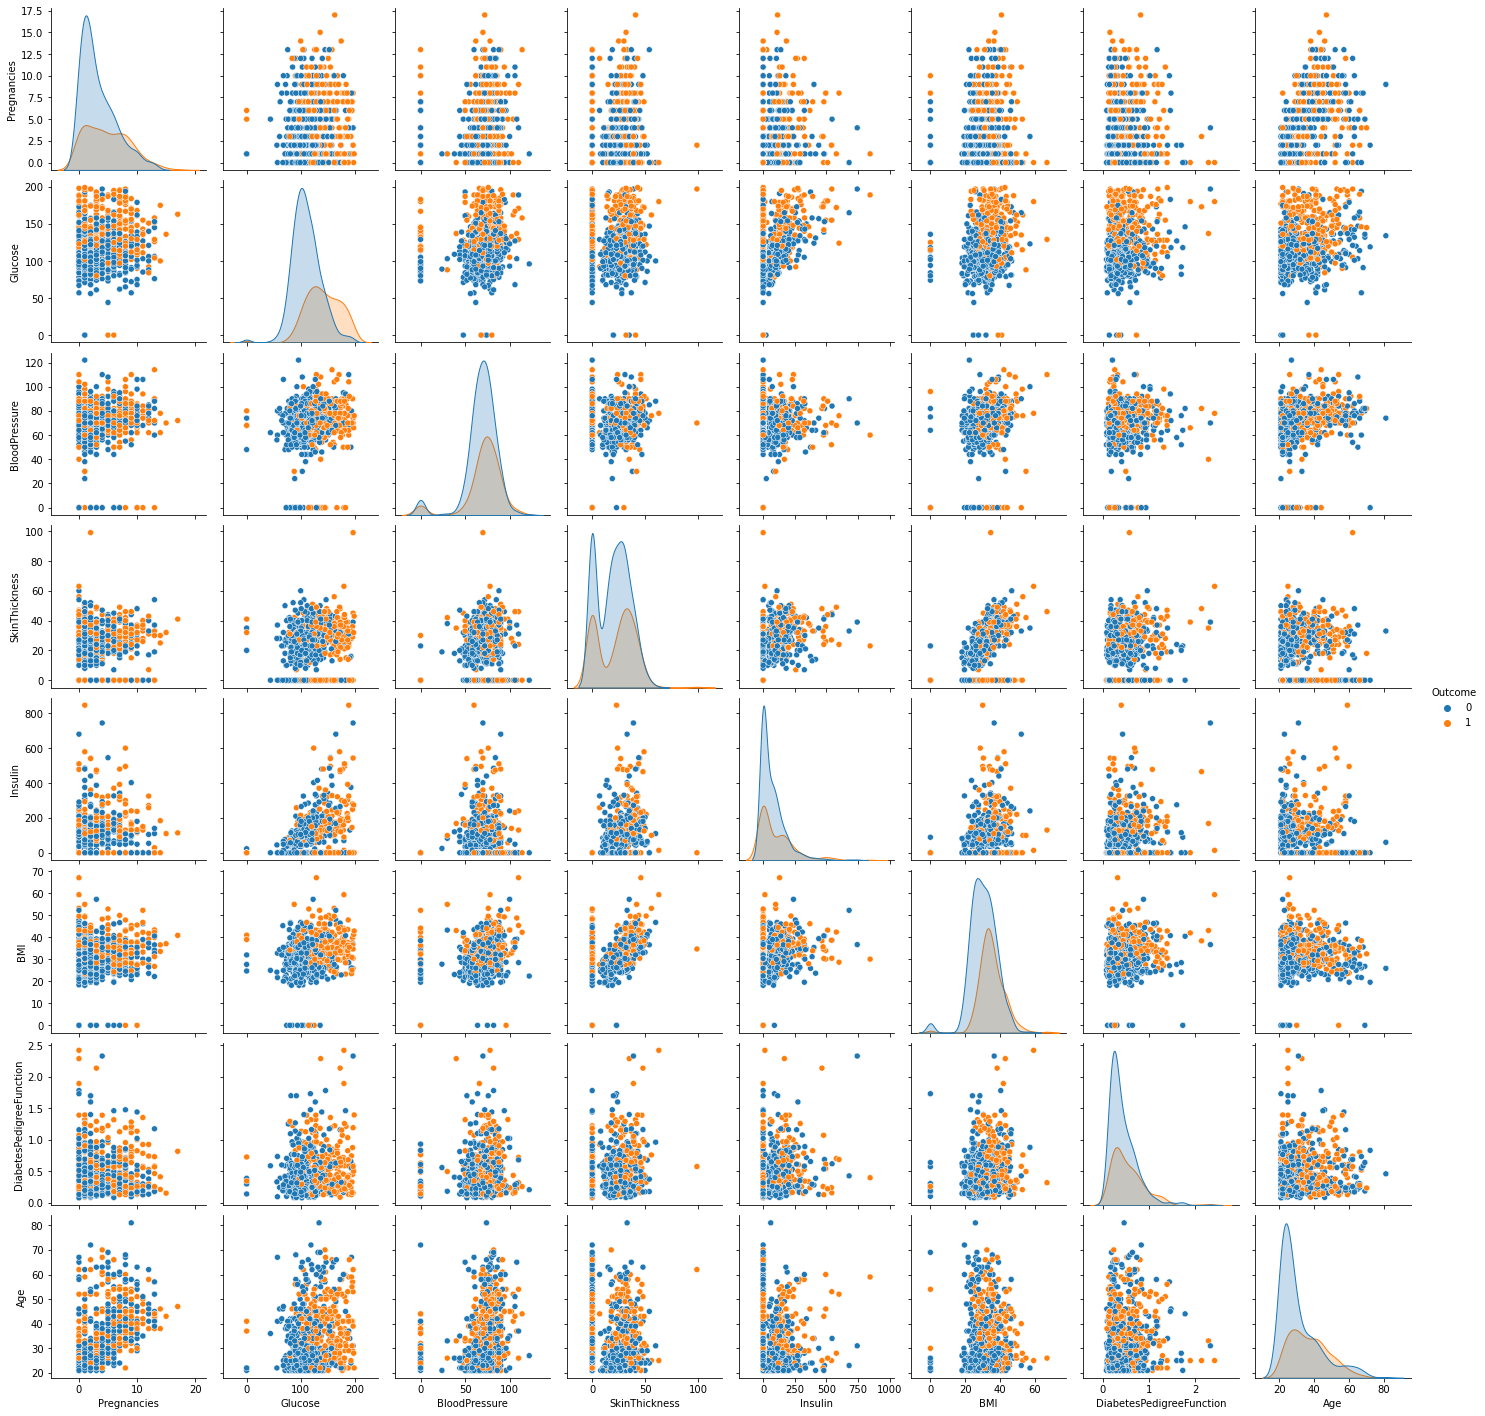

In [6]:
sns.pairplot(df,hue='Outcome')

# EDA 

1. is the difference in bmi between those with and without diabetes statistically signifigant?
2. What percentage of patients with above average glucose have diabetes compared to those with below average glucose
3. make seperate pairplots for patients with and without diabetes and analyze it
4. do this again to compare those who are and are not overweight

In [7]:
diabetic = df.loc[df['Outcome']==1]['BMI'].sample(100)
not_diabetic = df.loc[df['Outcome']==0]['BMI'].sample(100)

In [8]:
ttest_ind(diabetic, not_diabetic)

Ttest_indResult(statistic=4.43541948460671, pvalue=1.5226622172081277e-05)

In [9]:
np.mean(diabetic), np.mean(not_diabetic)

(35.782999999999994, 31.256999999999977)

Conclusion: BMI is signifigantly higher in patients with Diabetes.

Reccomendation: We can advise our patients get their BMI below 30, and we can provide obesity prevention guidelines to our patients. 

2. What percentage of patients with above average glucose have diabetes compared to those with below average glucose?

In [10]:
high_glucose = df.loc[df['Glucose']>np.mean(df['Glucose'])]
low_glucose = df.loc[df['Glucose']<np.mean(df['Glucose'])]

In [11]:
high_glucose_percent = round((len(high_glucose.loc[high_glucose['Outcome']==1]) / len(high_glucose))*100, 1)
low_glucose_percent = round((len(low_glucose.loc[low_glucose['Outcome']==1]) / len(low_glucose))*100, 1)
print('The average patient has a glucose of {}'.format(round(np.mean(df['Glucose']), 1)))
print()
print('{}% of patients with above average glucose have diabetes, compared to {}% for those with below average glucose'.format(high_glucose_percent, low_glucose_percent))

The average patient has a glucose of 120.9

55.9% of patients with above average glucose have diabetes, compared to 17.4% for those with below average glucose


Conclusion: having glucose concentration above 120 are much more than 3 times morelikley to be diabetic than those with concentration under 120.

Reccomendation: We should closley monitor the Glucose concentration in our patients.

3. make seperate pairplots for patients with and without diabetes and analyze it

In [12]:
high_glucose = []
for glu in df['Glucose']:
    high_glucose.append(int(glu>np.mean(df['Glucose'])))
    
df['High Glucose'] = high_glucose

C:\Users\aacjp\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\aacjp\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'patients with Glucose Concentration over 121')

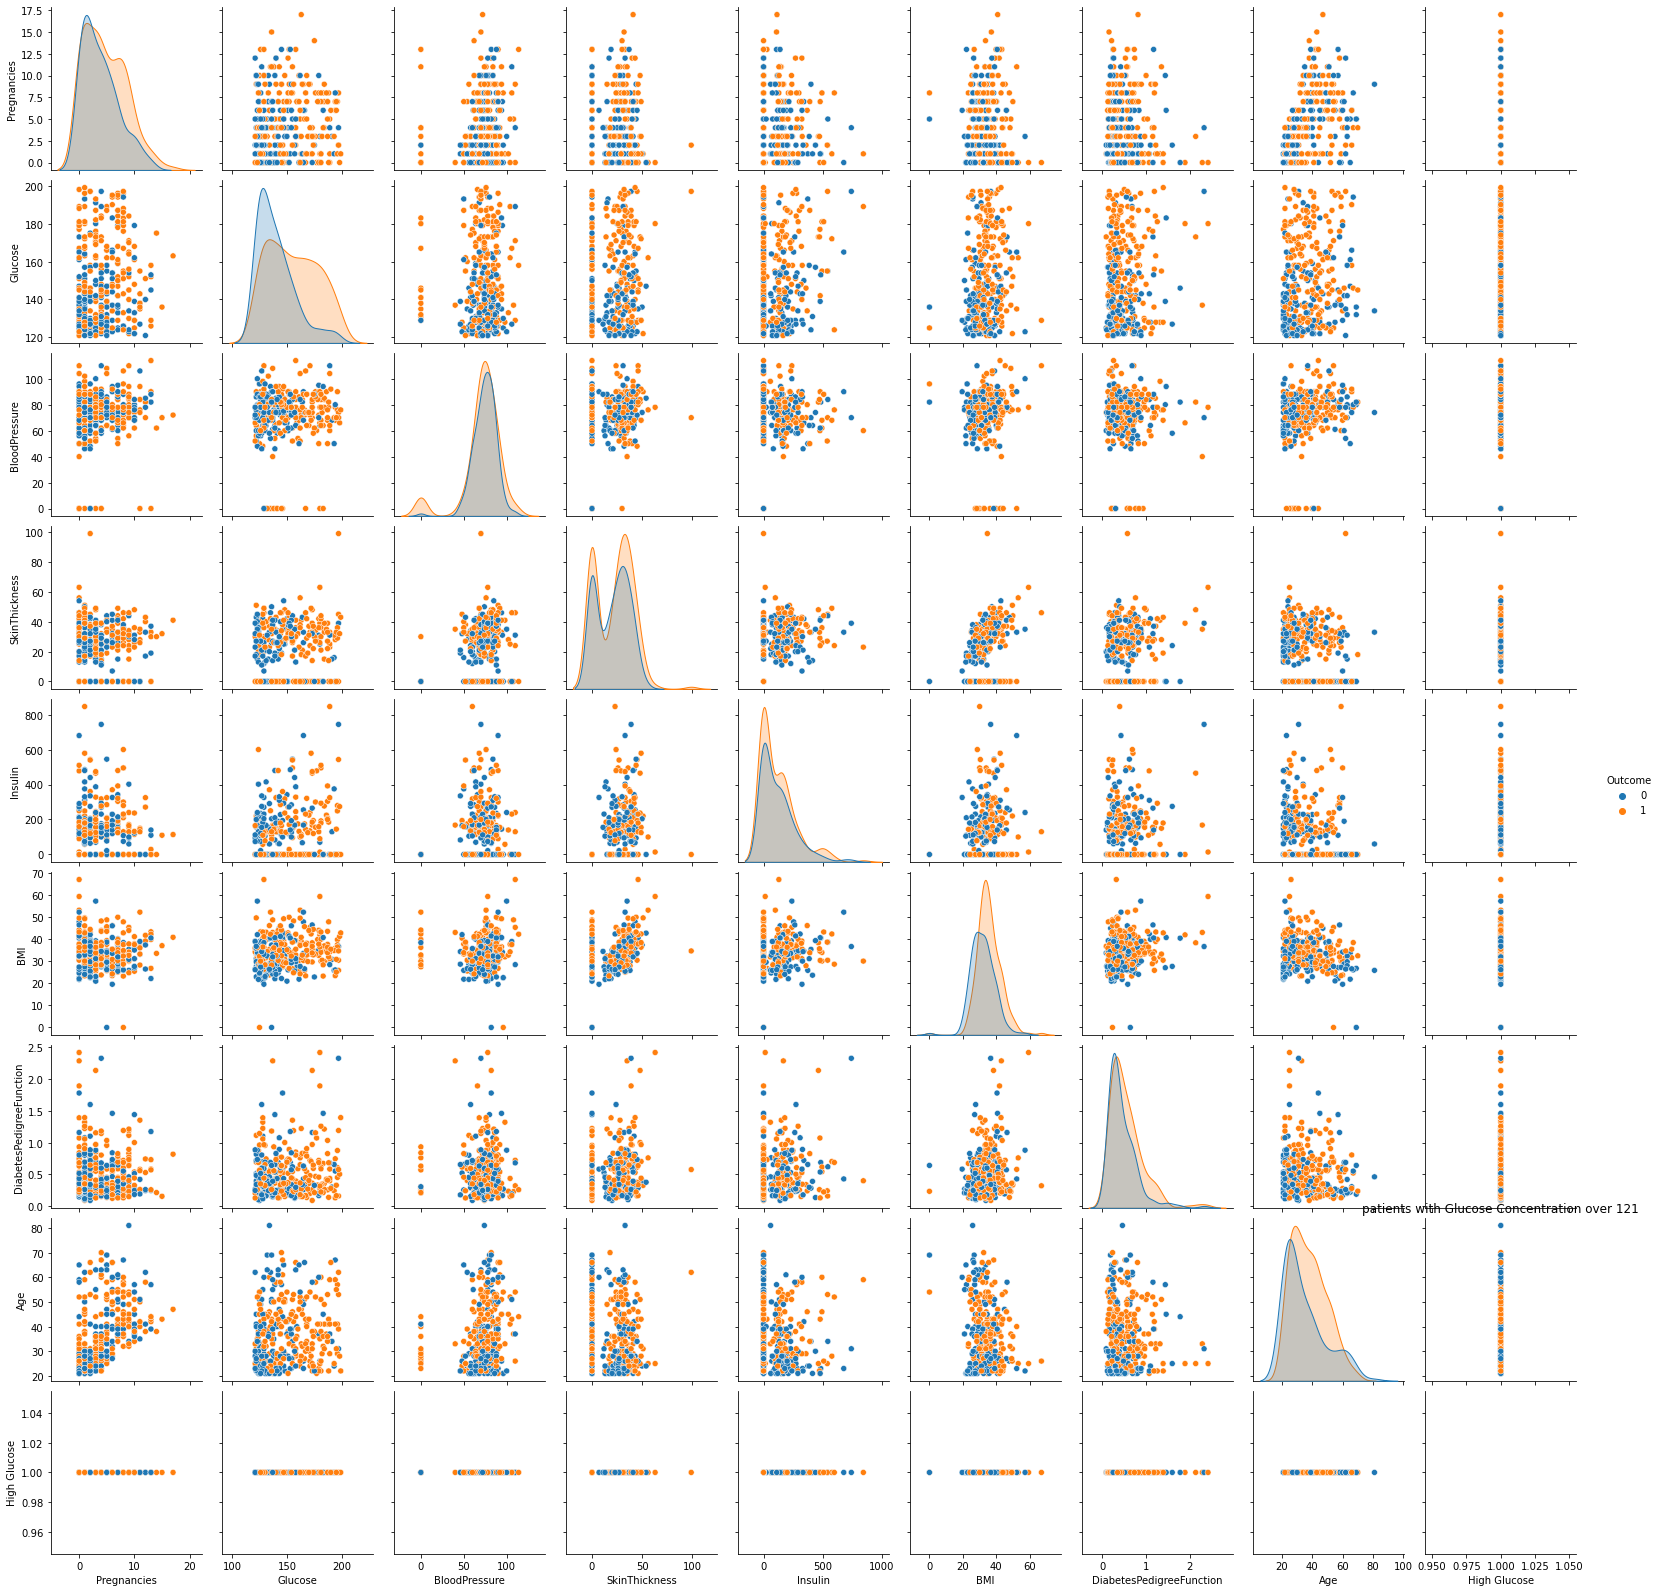

In [13]:
sns.pairplot(df.loc[df['High Glucose']==1],hue='Outcome')
plt.title('patients with Glucose Concentration over {}'.format(round(np.mean(df['Glucose']))))

C:\Users\aacjp\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\aacjp\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'patients with Glucose Concentration under 121')

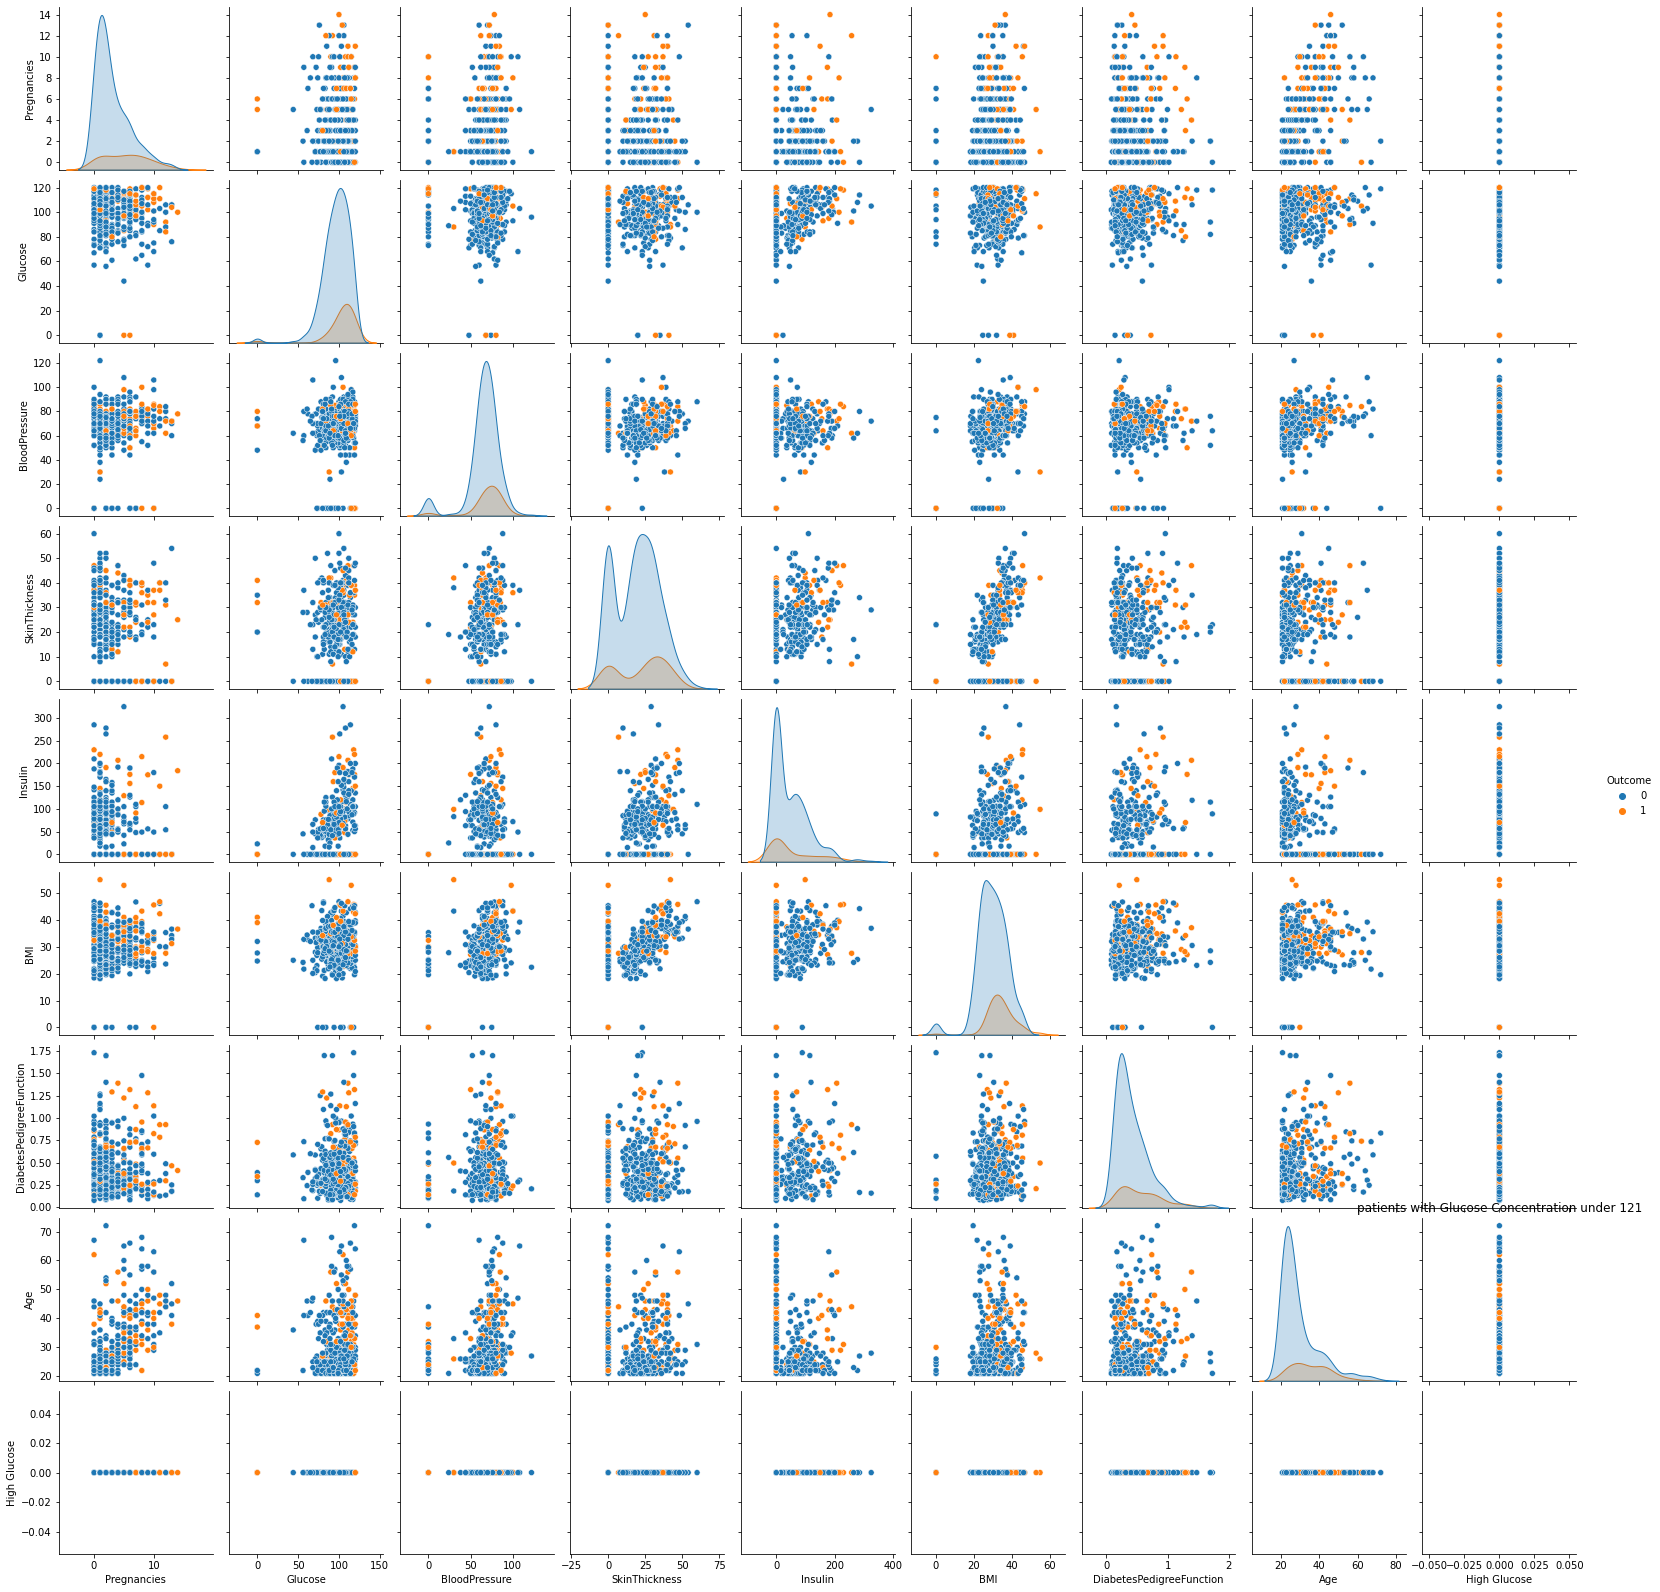

In [14]:
sns.pairplot(df.loc[df['High Glucose']==0],hue='Outcome')
plt.title('patients with Glucose Concentration under {}'.format(round(np.mean(df['Glucose']))))

4. do this again to compare those who are and are not overweight

Text(0.5, 1.0, 'Patients with Diabetes')

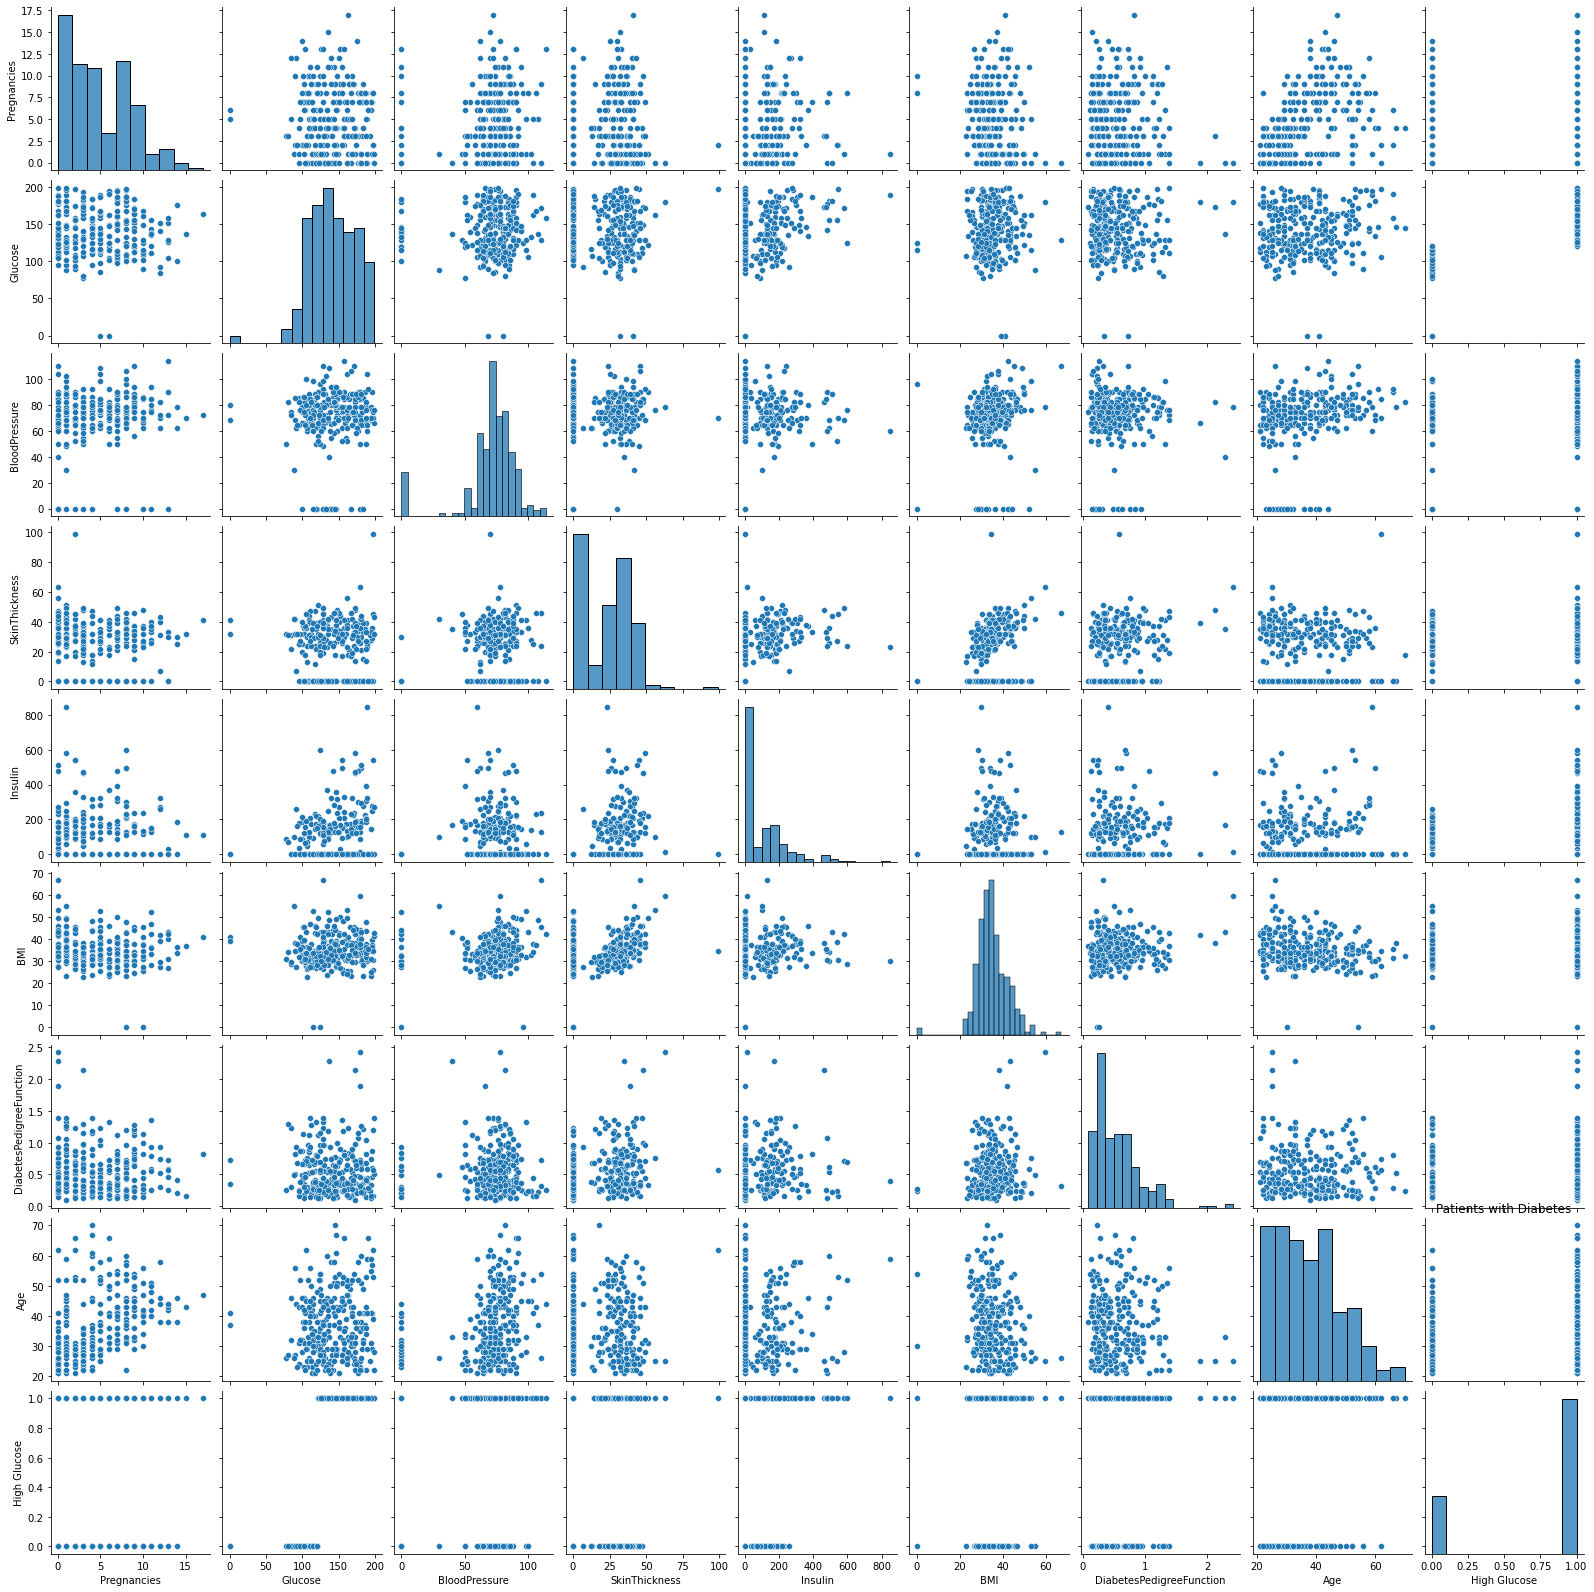

In [15]:
sns.pairplot(df.loc[df['Outcome']==1].drop(['Outcome'], axis='columns'))
plt.title('Patients with Diabetes')

Text(0.5, 1.0, 'Patients without Diabetes')

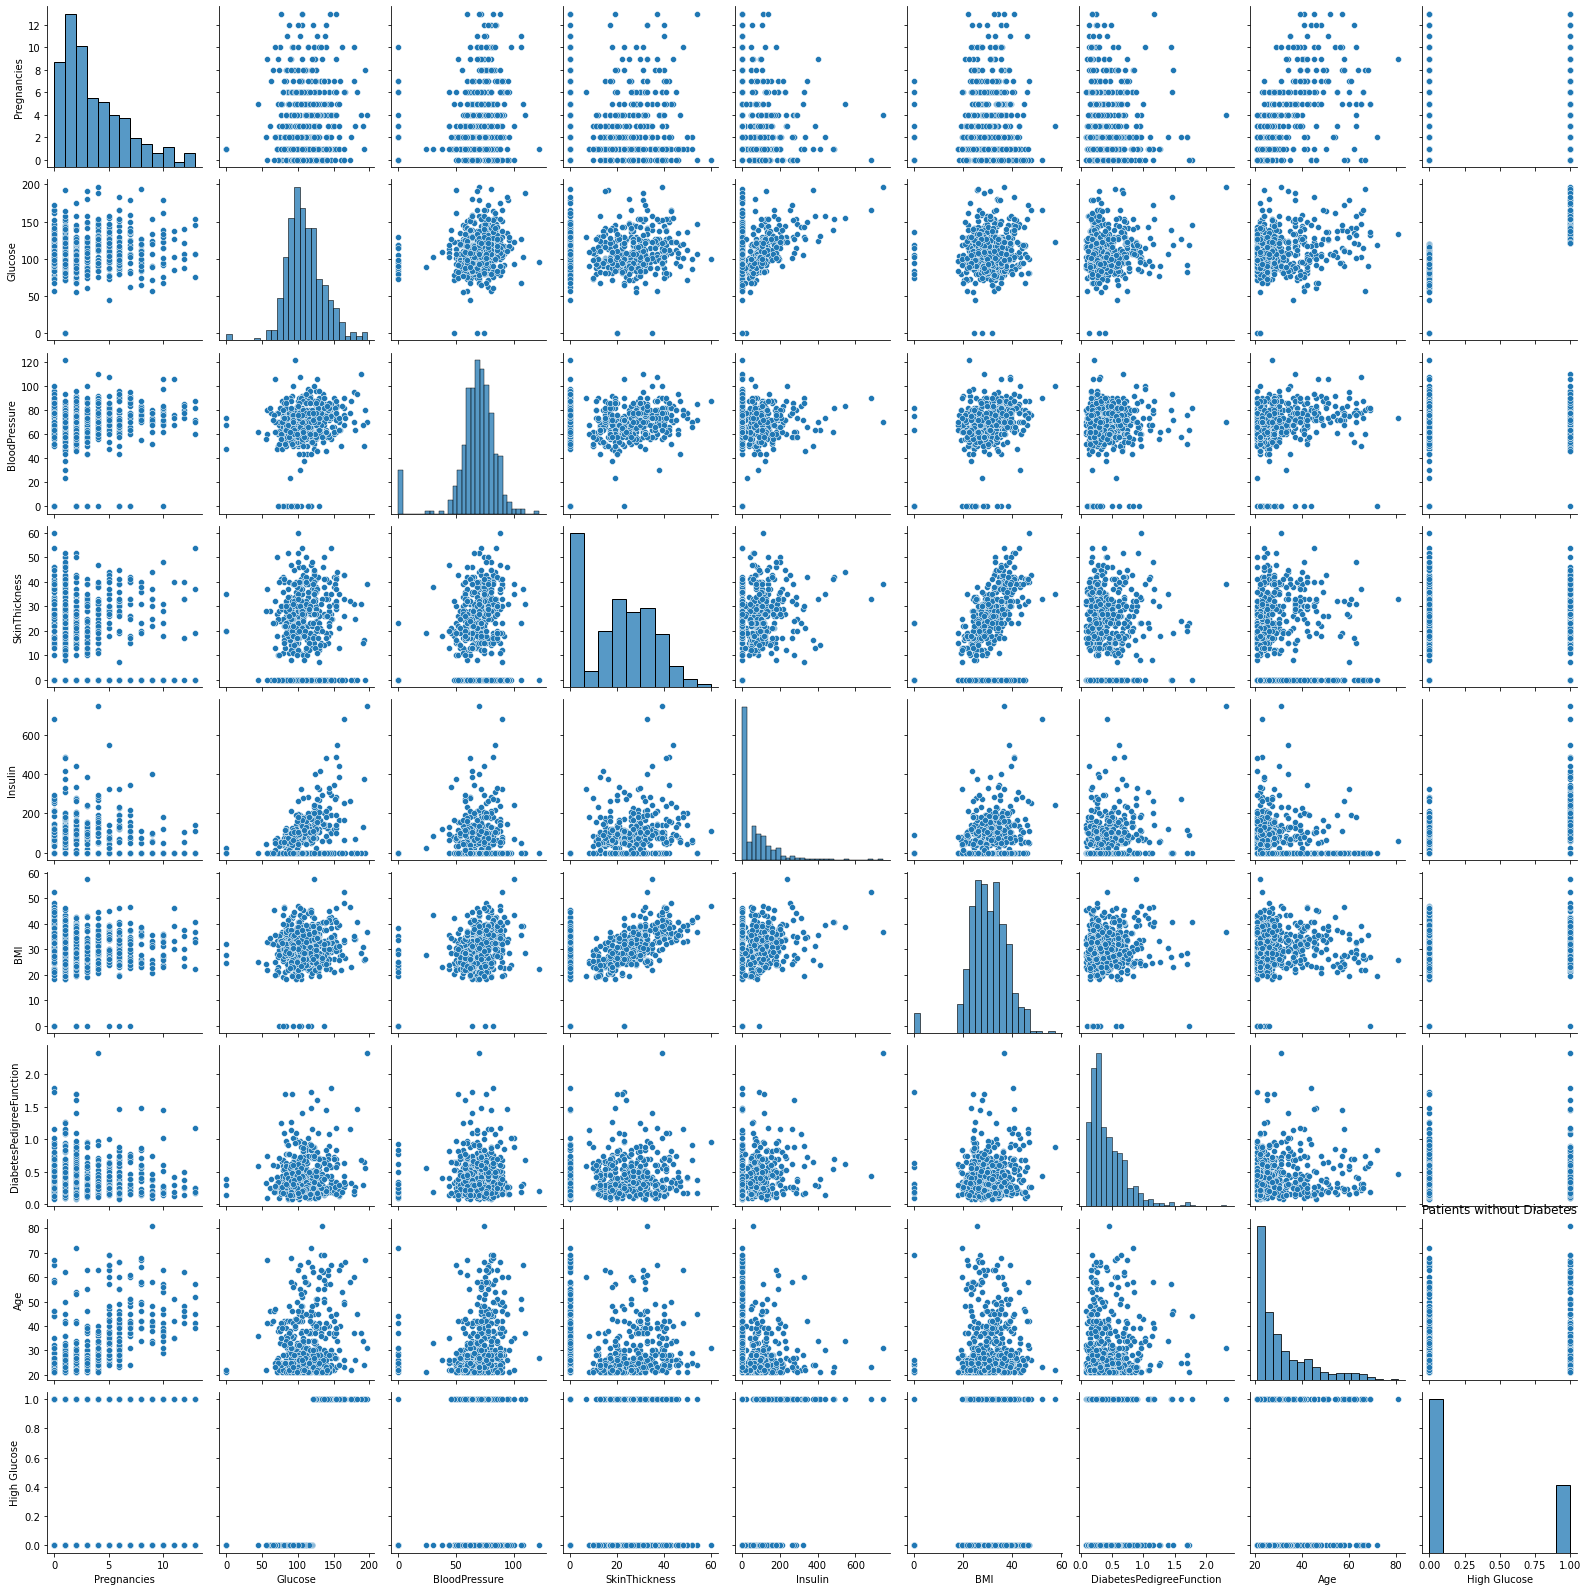

In [16]:
sns.pairplot(df.loc[df['Outcome']==0].drop(['Outcome'], axis='columns'))
plt.title('Patients without Diabetes')

## Key takeaways from the pairplots

1. Patients with Diabetes tend to have higher BMI's and almost all were overweight(bmi over 25). They also had higher skin thickness and higher Glucose concentration.
2. We found that Diabetic Patients were slightly older and had higher insulin, but the trend was not major
3. Blood Pressure was no different between patients with and without diabetes

In [23]:
df.loc[df['Outcome']==1]['BMI'].describe()

count    268.000000
mean      35.142537
std        7.262967
min        0.000000
25%       30.800000
50%       34.250000
75%       38.775000
max       67.100000
Name: BMI, dtype: float64

In [24]:
df.loc[df['Outcome']==0]['BMI'].describe()

count    500.000000
mean      30.304200
std        7.689855
min        0.000000
25%       25.400000
50%       30.050000
75%       35.300000
max       57.300000
Name: BMI, dtype: float64

In [25]:
df.loc[df['Outcome']==1]['SkinThickness'].describe()

count    268.000000
mean      22.164179
std       17.679711
min        0.000000
25%        0.000000
50%       27.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [26]:
df.loc[df['Outcome']==0]['SkinThickness'].describe()

count    500.000000
mean      19.664000
std       14.889947
min        0.000000
25%        0.000000
50%       21.000000
75%       31.000000
max       60.000000
Name: SkinThickness, dtype: float64

In [27]:
df.loc[df['Outcome']==1]['Glucose'].describe()

count    268.000000
mean     141.257463
std       31.939622
min        0.000000
25%      119.000000
50%      140.000000
75%      167.000000
max      199.000000
Name: Glucose, dtype: float64

In [28]:
df.loc[df['Outcome']==0]['Glucose'].describe()

count    500.0000
mean     109.9800
std       26.1412
min        0.0000
25%       93.0000
50%      107.0000
75%      125.0000
max      197.0000
Name: Glucose, dtype: float64

In [29]:
df.loc[df['Outcome']==1]['Age'].describe()

count    268.000000
mean      37.067164
std       10.968254
min       21.000000
25%       28.000000
50%       36.000000
75%       44.000000
max       70.000000
Name: Age, dtype: float64

In [31]:
df.loc[df['Outcome']==0]['Age'].describe()

count    500.000000
mean      31.190000
std       11.667655
min       21.000000
25%       23.000000
50%       27.000000
75%       37.000000
max       81.000000
Name: Age, dtype: float64

In [32]:
df.loc[df['Outcome']==1]['Insulin'].describe()

count    268.000000
mean     100.335821
std      138.689125
min        0.000000
25%        0.000000
50%        0.000000
75%      167.250000
max      846.000000
Name: Insulin, dtype: float64

In [33]:
df.loc[df['Outcome']==0]['Insulin'].describe()

count    500.000000
mean      68.792000
std       98.865289
min        0.000000
25%        0.000000
50%       39.000000
75%      105.000000
max      744.000000
Name: Insulin, dtype: float64

In [34]:
df.loc[df['Outcome']==1]['BloodPressure'].describe()

count    268.000000
mean      70.824627
std       21.491812
min        0.000000
25%       66.000000
50%       74.000000
75%       82.000000
max      114.000000
Name: BloodPressure, dtype: float64

In [36]:
df.loc[df['Outcome']==0]['BloodPressure'].describe()

count    500.000000
mean      68.184000
std       18.063075
min        0.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      122.000000
Name: BloodPressure, dtype: float64

# Modeling

In [38]:
df2 = df.drop(['High Glucose'], axis='columns')
df2

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [41]:
results = Wrappers().WrapML(df2, 'Outcome', 'classification')

Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Smoting!!

Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 3 folds for each of 88 candidates, totalling 264 fits


[Parallel(n_jobs=-1)]: Done 264 out of 264 | elapsed:    1.8s finished


In [43]:
model = results[0]
train = results[1]
val = results[2]
scaler = results[3]

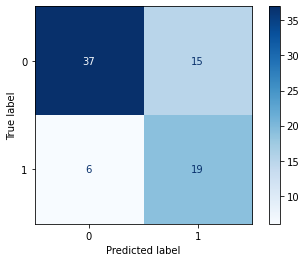

In [49]:
Xval = val.drop(['Outcome'], axis='columns')
yval = val['Outcome']
Evaluater().BuildConfusion(model, Xval, yval)

In [50]:
56/77

0.7272727272727273

In [51]:
19/25

0.76

In [56]:
MachineLearning().GetGrids(train.drop(['Outcome'], axis='columns'), train['Outcome'], 'classification')['rfc']

[{'n_estimators': [50, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80],
  'criterion': ['gini', 'entropy'],
  'max_depth': [2, 5, 8, None]},
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)]

In [55]:
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


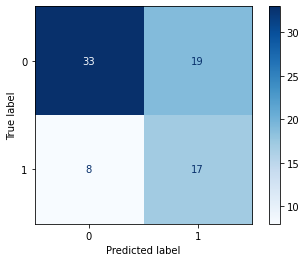

In [62]:
grid = {'n_estimators': [52], 'max_depth': [10], 'min_samples_split': [3, 4], 'min_weight_fraction_leaf': [0.1]}
clf = MachineLearning().Optimize(model, grid, train.drop(['Outcome'], axis='columns'), train['Outcome'])
Evaluater().BuildConfusion(clf, Xval, yval)

In [63]:
50 / 77

0.6493506493506493

In [64]:
17/25

0.68

In [65]:
clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.1, n_estimators=52,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)